In [1]:
import numpy as np
import scipy as sp
import time
import matplotlib
import matplotlib.pyplot as plt
import math

In [14]:
def buildFm(q,m):
    vecs = []
    vecs.append([1])
    for l in range(2,m+1):
        vecs.append([q*l-q+1,q*l-q-1])
        #vecs.append(q*l-q-1)
    return vecs

def redFm(q,m):
    r = 2*m+1
    vecs = buildFm(q,m)
    newvecs = []
    for vec in vecs:
        if len(vec)==1:
            j = vec[0]%r
            if j <= m:
                newvec = j
                newvecs.append([newvec])
            else:
                newvec = r-j
                newvecs.append([newvec])
        else: 
            vecL = vec[0]
            vecF = vec[1]
            jL = vecL%r
            jF = vecF%r
            if jL <= m:
                newvecL = jL
            else:
                newvecL = r-jL
            if jF <= m:
                newvecF = jF
            else:
                newvecF = r-jF
            newvecs.append([newvecL,newvecF])
    for i in range(len(newvecs)):
        if len(newvecs[i])==1 and newvecs[i][0]==0:
            newvecs[i] = []
        if len(newvecs[i])==2:
            if newvecs[i][0]==0:
                newvecs[i] = [newvecs[i][1]]
            elif newvecs[i][1]==0:
                newvecs[i] = [newvecs[i][0]]
    return newvecs

def buildRepm(q,m):
    mat = np.zeros((m,m))
    redvecs = redFm(q,m)
    for l in range(1,m+1):
        vec = redvecs[l-1]
        if len(vec)==1:
            for i in range(1,m+1):
                if vec[0]==i:
                    mat[i-1,l-1] = 1
        if len(vec)==2:
            for i in range(1,m+1):
                if vec[0]==i:
                    mat[i-1,l-1] = 1
                if vec[1]==i:
                    mat[i-1,l-1] = 1
    mat = mat.astype('int')
    return mat

def buildRow2N(q,m):
    mat = buildRepm(q,m)
    if m > q//2:
        row2N = mat[q//2-1]
        return row2N
    else:
        print("m is too small")
        
def buildRow2Nminus(q,m):
    mat = buildRepm(q,m)
    if m > q//2:
        row2N = mat[q//2-2]
        return row2N
    else:
        print("m is too small")
        
def buildRow2Nplus(q,m):
    mat = buildRepm(q,m)
    if m > q//2:
        row2N = mat[q//2]
        return row2N
    else:
        print("m is too small")

In [18]:
math.gcd(15,6)

3

In [23]:
q = 9
for m in range(1,20):
    if math.gcd((2*m+1),q)==1:
        print(m)
        print(buildRepm(q,m))
        print("-------------")

2
[[1 0]
 [0 1]]
-------------
3
[[1 1 0]
 [0 0 1]
 [0 1 1]]
-------------
5
[[1 1 0 0 0]
 [0 0 0 0 1]
 [0 1 1 0 0]
 [0 0 0 1 1]
 [0 0 1 1 0]]
-------------
6
[[1 0 0 0 0 0]
 [0 0 0 1 1 0]
 [0 1 0 0 0 0]
 [0 0 1 0 1 0]
 [0 1 0 0 0 1]
 [0 0 1 0 0 1]]
-------------
8
[[1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 0 0]
 [0 1 0 1 0 0 0 0]]
-------------
9
[[1 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 1]
 [0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 0 0 0 0]]
-------------
11
[[1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0 0 0 1 0]]
-------------
12
[[1 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1]
 [0 0 0 1 0

In [3]:
def f(s):
    return (s-1)/(2*s+1)
def ff(s,k):
    e1 = math.floor((1-k)/(2*s+1))
    e2 = math.ceil((s-k)/(2*s+1))
    return e1+2<=e2
    

In [16]:
for k in range(0,1):
    for s in range(1,22):
        if ff(s,k):
            print((s,k))
    print("-------------------")

-------------------


In [3]:
buildRepm(16,11)

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.]])

In [4]:
import math
def lntop(n,m,N):
    return 1+(2*n*m+n-1)/(2**N) 
def lnbottom(n,m,N):
    return 1+(2*n*m+n+1)/(2**N) 

In [6]:
def nsp(N,s,k):
    return (2**N *k +1)/(2*s+1)
def nsm(N,s,k):
    return (2**N *k -1)/(2*s+1)

In [24]:
for N in range(3,10):
    print("N=%s" % N)
    nsvals = []
    kvals = []
    svals=[]
    for s in range(2**(N-1)):
        for k in range(s+1):
            nsminus = nsm(N,s,k)
            f,i = math.modf(nsminus)
            if f==0 and nsminus>0:
                svals.append(s)
                kvals.append(k)
                nsvals.append(int(nsminus))
    print(svals)
    print(kvals)
    print(nsvals)
    #print(len(nsvals))
    #print(2**(N-1))

N=3
[2, 3]
[2, 1]
[3, 1]
N=4
[1, 2, 4, 7]
[1, 1, 4, 1]
[5, 3, 7, 1]
N=5
[3, 4, 8, 9, 10, 13, 14, 15]
[2, 2, 8, 3, 2, 11, 10, 1]
[9, 7, 15, 5, 3, 13, 11, 1]
N=6
[1, 3, 4, 5, 7, 8, 10, 11, 12, 14, 16, 18, 22, 25, 29, 31]
[1, 1, 1, 5, 4, 4, 1, 9, 9, 5, 16, 11, 19, 4, 12, 1]
[21, 9, 7, 29, 17, 15, 3, 25, 23, 11, 31, 19, 27, 5, 13, 1]
N=7
[2, 6, 7, 8, 15, 16, 23, 24, 25, 29, 32, 33, 35, 36, 37, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54, 58, 59, 60, 62, 63]
[2, 6, 2, 2, 8, 8, 18, 18, 2, 6, 32, 11, 5, 4, 17, 24, 2, 17, 16, 32, 8, 41, 15, 33, 32, 51, 23, 32, 53, 52, 42, 1]
[51, 59, 17, 15, 33, 31, 49, 47, 5, 13, 63, 21, 9, 7, 29, 37, 3, 25, 23, 45, 11, 53, 19, 41, 39, 61, 27, 35, 57, 55, 43, 1]
N=8
[1, 2, 3, 5, 6, 7, 8, 11, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 27, 29, 31, 32, 34, 36, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 52, 55, 56, 57, 58, 60, 61, 62, 64, 68, 73, 74, 76, 77, 78, 84, 90, 92, 94, 97, 99, 101, 107, 113, 114, 115, 117, 118, 123, 127]
[1, 1, 2, 4, 3, 1, 1, 8, 4, 4, 16, 1

In [28]:
for N in range(3,11):
    print("N=%s" % N)
    nsvals = []
    kvals = []
    for s in range(2**(N-1)):
        for k in range(s+1):
            nsplus = nsp(N,s,k)
            f,i = math.modf(nsplus)
            if f==0:
                kvals.append(k)
                nsvals.append([int(nsplus),1])
            nsminus = nsm(N,s,k)
            f,i = math.modf(nsminus)
            if f==0 and nsminus>0:
                kvals.append(k)
                nsvals.append([int(nsminus),-1])
    print(kvals)
    print(nsvals)
    print(len(nsvals))
    print(2**(N-1))

N=3
[0, 1, 2, 1]
[[1, 1], [3, 1], [3, -1], [1, -1]]
4
4
N=4
[0, 1, 1, 3, 4, 2, 4, 1]
[[1, 1], [5, -1], [3, -1], [7, 1], [7, -1], [3, 1], [5, 1], [1, -1]]
8
8
N=5
[0, 1, 2, 2, 2, 1, 2, 7, 8, 3, 2, 5, 7, 11, 10, 1]
[[1, 1], [11, 1], [13, 1], [9, -1], [7, -1], [3, 1], [5, 1], [15, 1], [15, -1], [5, -1], [3, -1], [7, 1], [9, 1], [13, -1], [11, -1], [1, -1]]
16
16
N=6
[0, 1, 1, 1, 1, 5, 1, 4, 4, 8, 1, 9, 9, 8, 5, 15, 16, 6, 11, 14, 16, 2, 19, 11, 13, 4, 24, 6, 8, 12, 20, 1]
[[1, 1], [21, -1], [13, 1], [9, -1], [7, -1], [29, -1], [5, 1], [17, -1], [15, -1], [27, 1], [3, -1], [25, -1], [23, -1], [19, 1], [11, -1], [31, 1], [31, -1], [11, 1], [19, -1], [23, 1], [25, 1], [3, 1], [27, -1], [15, 1], [17, 1], [5, -1], [29, 1], [7, 1], [9, 1], [13, -1], [21, 1], [1, -1]]
32
32
N=7
[0, 1, 2, 3, 4, 3, 6, 2, 2, 4, 10, 7, 8, 4, 12, 8, 8, 3, 13, 7, 8, 1, 13, 18, 18, 2, 12, 3, 4, 6, 10, 31, 32, 11, 7, 5, 4, 17, 3, 29, 31, 24, 2, 17, 16, 32, 8, 23, 25, 41, 15, 33, 32, 51, 23, 13, 15, 53, 32, 53, 52, 49, 4

In [38]:
for N in range(3,4):
    print(N)
    print(2**(N-1))
    for r in range(2**N+3,2**(N)+2,2):
        m = (r-1)//2
        for n in range(1,2**(N-1)+1,2):
            lnt = lntop(n,m,N)
            f,i = math.modf(lnt)
            if f==0:
                print("m = %s" % m)
                print("n = %s" % n)
                print(lnt)
                print("top sign")
                print("-------------------")
            lnb = lnbottom(n,m,N)
            f,i = math.modf(lnb)
            if f==0:
                print("m = %s" % m)
                print("n = %s" % n)
                print(lnb)
                print("bottom sign")
                print("-------------------")

    print("-------------------------------------------")

3
4
-------------------------------------------


In [ ]:
N = 7
s = 2
m2s = [k*2**(N-1)+s for k in range(1,20)]
for m in m2s:
    for n in range(1,2**(N-1)+1):
        lnt = lntop(n,m,N)
        f,i = math.modf(lnt)
        if f==0:
            print("m = %s" % m)
            print("n = %s" % n)
            print(lnt)
            print("top sign")
            k = ((2*s+1)*n-1)/(2**N)
            print(k)
            print("-------------------")
        lnb = lnbottom(n,m,N)
        f,i = math.modf(lnb)
        if f==0:
            print("m = %s" % m)
            print("n = %s" % n)
            print(lnb)
            print("bottom sign")
            k = ((2*s+1)*n+1)/(2**N)
            print(k)
            print("-------------------")
    print("-------------------------------------------")

In [78]:
s = 4
for N in range(3,21):
    print("N = %s" % N)
    m2s = [k*2**(N-1)+s for k in range(1,6)]
    for m in m2s:
        for n in range(1,2**(N-1)+1):
            lnt = lntop(n,m,N)
            f,i = math.modf(lnt)
            if f==0:
                #print("m = %s" % m)
                #print("top sign")
                k = ((2*s+1)*n-1)/(2**N)
                print(k)
                print("-------------------")
            lnb = lnbottom(n,m,N)
            f,i = math.modf(lnb)
            if f==0:
                #print("m = %s" % m)
                #print("bottom sign")
                k = ((2*s+1)*n+1)/(2**N)
                print(k)
                print("-------------------")
    print("-------------------------------------------")

N = 3
1.0
-------------------
1.0
-------------------
1.0
-------------------
1.0
-------------------
1.0
-------------------
-------------------------------------------
N = 4
4.0
-------------------
4.0
-------------------
4.0
-------------------
4.0
-------------------
4.0
-------------------
-------------------------------------------
N = 5
2.0
-------------------
2.0
-------------------
2.0
-------------------
2.0
-------------------
2.0
-------------------
-------------------------------------------
N = 6
1.0
-------------------
1.0
-------------------
1.0
-------------------
1.0
-------------------
1.0
-------------------
-------------------------------------------
N = 7
4.0
-------------------
4.0
-------------------
4.0
-------------------
4.0
-------------------
4.0
-------------------
-------------------------------------------
N = 8
2.0
-------------------
2.0
-------------------
2.0
-------------------
2.0
-------------------
2.0
-------------------
------------------------

In [3]:
q=8
for m in range(5,12):
    print("m=%s" % m)
    rowm = buildRow2Nminus(q,m)
    #print(rowm)
    nonzerom = np.nonzero(rowm)
    rowp = buildRow2Nplus(q,m)
    #print(rowp)
    nonzerop = np.nonzero(rowp)
    print(nonzerom[0]+1)
    print(nonzerop[0]+1)
    print("--------------------------")

m=5
[4]
[3]
--------------------------
m=6
[4]
[5]
--------------------------
m=7
[5]
[4]
--------------------------
m=8
[5]
[6]
--------------------------
m=9
[6]
[5]
--------------------------
m=10
[6]
[7]
--------------------------
m=11
[7]
[6]
--------------------------


In [13]:
mat = buildRepm(32,24)
print("m= %s" % 24)
print(mat)
print(sum(sum(mat)))

m= 24
[[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1.

In [4]:
q=32
minm = q//2+1
maxm = 19
mm = []
indm = []
for m in range(minm,maxm):
    mat = buildRepm(q,m)
    print("m= %s" % m)
    print(mat)
    print("--------------")

m= 17
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
--------------
m= 18
[[1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [39]:
indm = np.array(indm)
indp = np.array(indp)
arr = indm-indp
print(arr)

[ 1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1
  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1  1 -1  1 -1 -1  1]


In [33]:
indm = np.array(indm)
indp = np.array(indp)
arr = indm-indp
print(arr)

[ 1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]


q=2
2.0
1.0


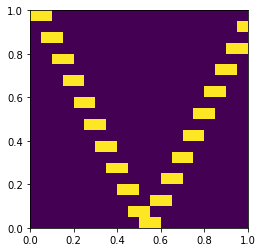

q=4
1.0
1.0


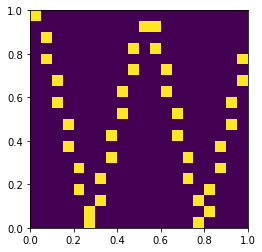

q=8
1.0
1.0


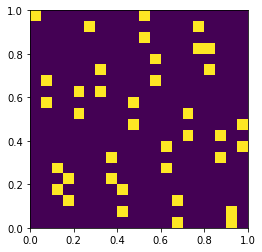

q=16
1.0
1.0


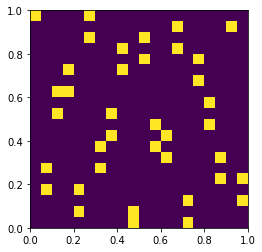

q=32
1.0
1.0


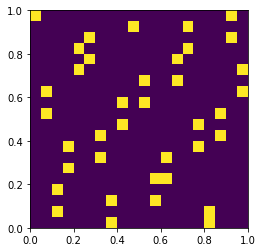

q=64


IndexError: index 30 is out of bounds for axis 0 with size 20

In [116]:
for N in range(1,8):
    q = 2**N
    mat = buildRepm(q,20)
    print("q=%s" % q)
    print(sum(mat[q//2-2]))
    print(sum(mat[q//2]))

    matplotlib.pyplot.imshow(mat, extent=[0,1,0,1])
    plt.show()

3


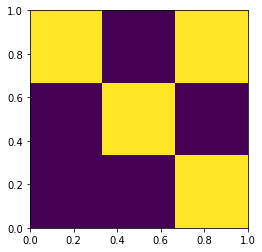

4


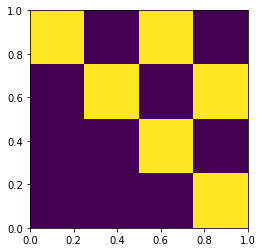

5


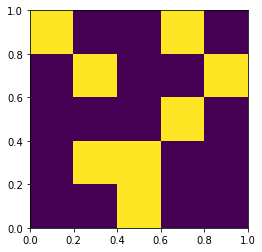

6


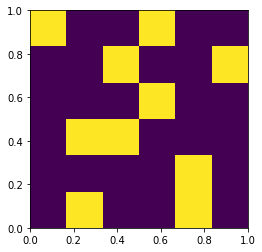

7


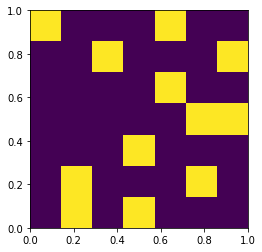

8


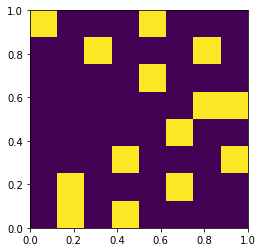

9


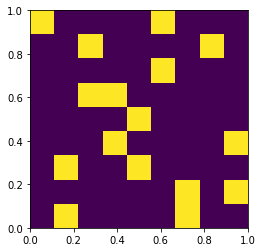

10


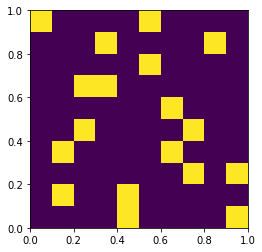

11


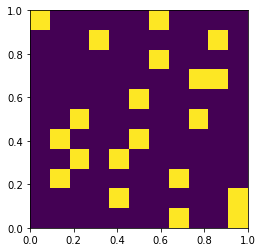

12


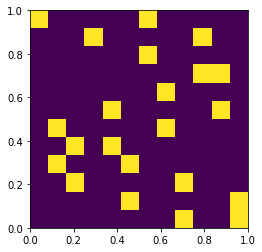

13


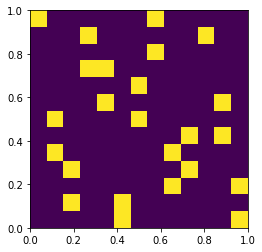

14


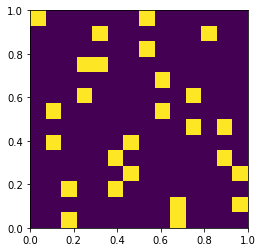

15


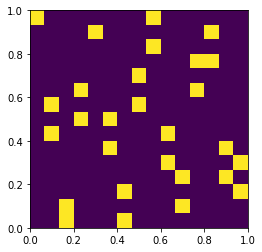

16


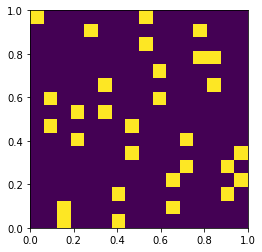

17


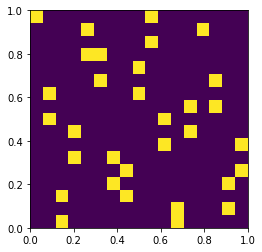

18


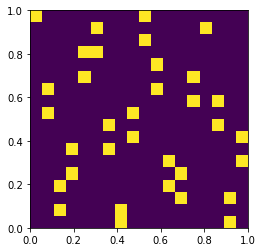

19


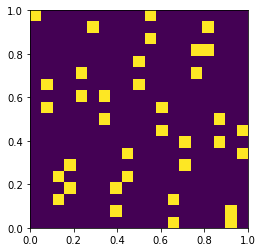

20


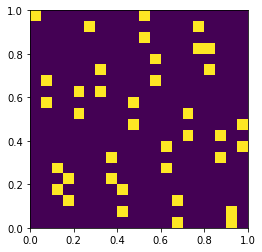

21


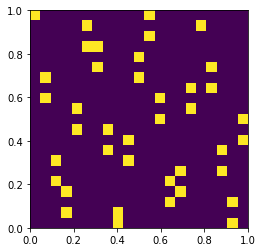

22


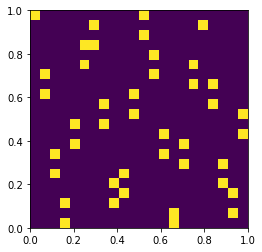

23


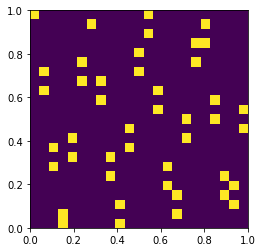

24


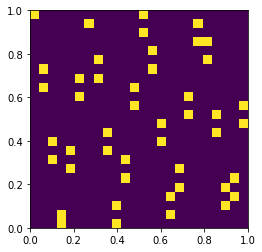

25


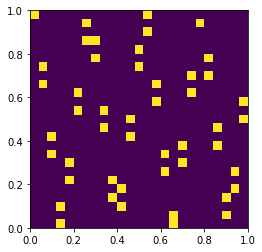

26


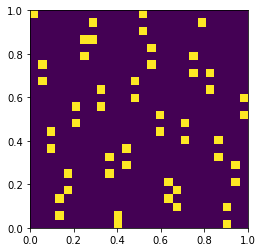

27


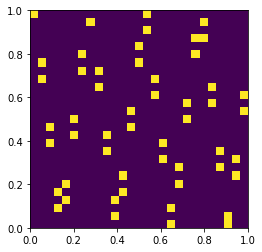

28


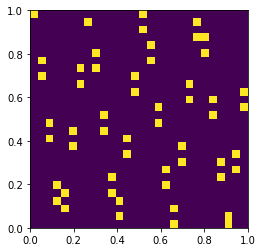

29


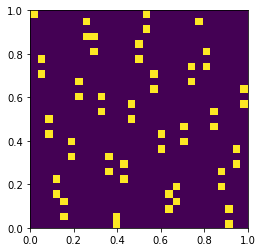

30


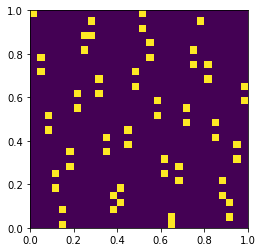

31


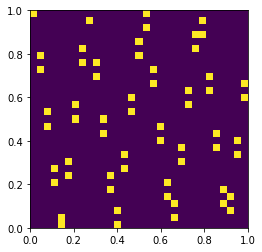

32


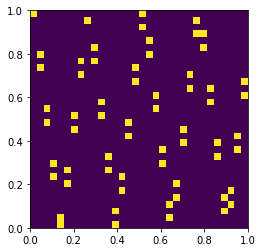

In [56]:
q=8
minm = q//2-1
maxm = 4*q+1
#maxm = 2*q+1
step=2
for m in range(minm,maxm,step):
    mat = buildRepm(q,m)
    print(m)

    matplotlib.pyplot.imshow(mat, extent=[0,1,0,1])
    plt.show()
    
    mat = buildRepm(q,m+1)
    print(m+1)

    matplotlib.pyplot.imshow(mat, extent=[0,1,0,1])
    plt.show()

9
[4 5]


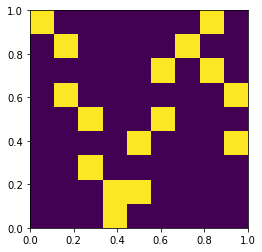

10
[7 8]


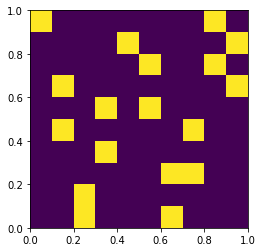

11
[2 3]


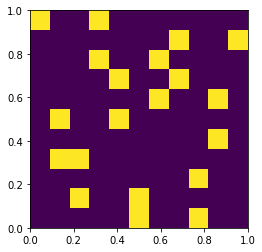

12
[2 3]


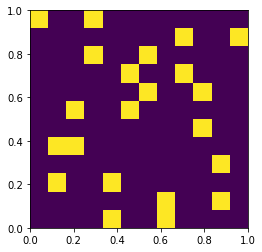

13
[ 9 10]


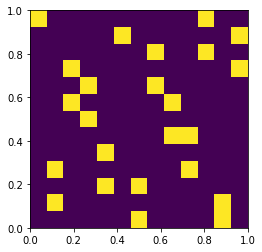

14
[6 7]


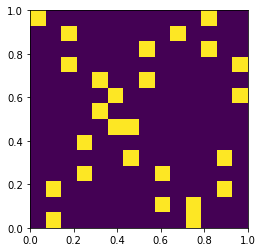

15
[14 15]


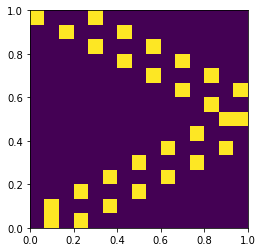

16
[15 16]


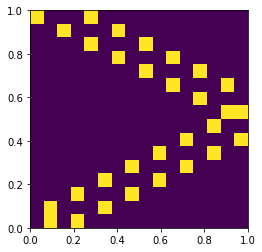

17
[7 8]


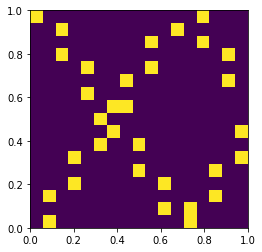

18
[12 13]


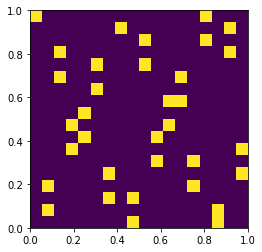

19
[3 4]


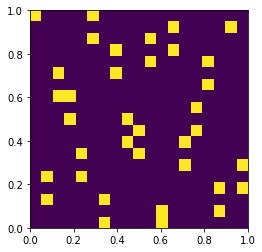

20
[3 4]


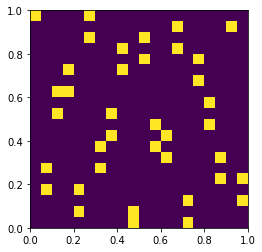

21
[14 15]


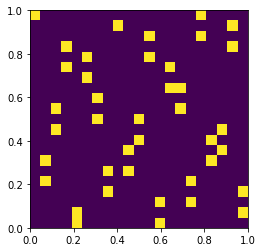

22
[ 9 10]


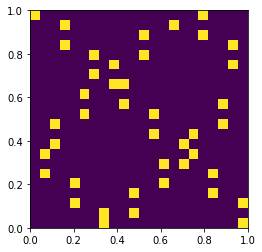

23
[21 22]


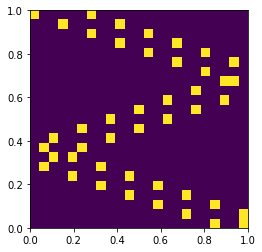

24
[22 23]


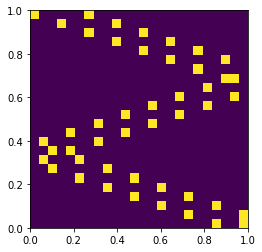

25
[10 11]


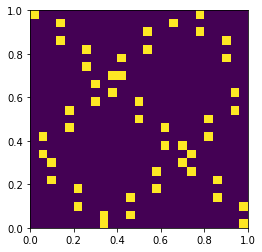

26
[17 18]


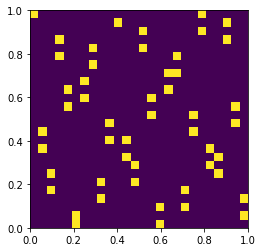

27
[4 5]


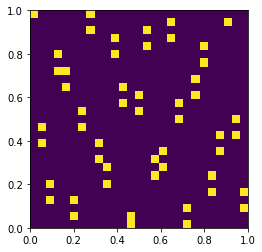

In [45]:
for m in range(9,28):
    mat = buildRepm(16,m)
    print(m)
    #print(sum(mat[6]))
    #print(sum(mat[8]))
    nonzero = np.nonzero(mat[7])
    print(nonzero[0]+1)

    matplotlib.pyplot.imshow(mat, extent=[0,1,0,1])
    plt.show()

In [91]:
print(buildFm(16,30))
print("---------------------------------------------------------------------")
print(redFm(16,30))

[[1], [17, 15], [33, 31], [49, 47], [65, 63], [81, 79], [97, 95], [113, 111], [129, 127], [145, 143], [161, 159], [177, 175], [193, 191], [209, 207], [225, 223], [241, 239], [257, 255], [273, 271], [289, 287], [305, 303], [321, 319], [337, 335], [353, 351], [369, 367], [385, 383], [401, 399], [417, 415], [433, 431], [449, 447], [465, 463]]
---------------------------------------------------------------------
[[1], [17, 15], [28, 30], [12, 14], [4, 2], [20, 18], [25, 27], [9, 11], [7, 5], [23, 21], [22, 24], [6, 8], [10, 8], [26, 24], [19, 21], [3, 5], [13, 11], [29, 27], [16, 18], [2], [16, 14], [29, 30], [13, 15], [3, 1], [19, 17], [26, 28], [10, 12], [6, 4], [22, 20], [23, 25]]


In [43]:
2**4+2**9

528